*Please use your own API key from OpenWeather in order to run this script.

Observable Trends
- The cities near where the latitude coordinates are near 0, the hotter the temperatures are. Cities farther away from 0 are colder.
- There seems to be no correlation between cloudiness and latitude coordinates.
- There also seems to be no real correlation between wind speed and latitude coordinates.
- Humidity also has no correlation to latitude coordinates.
- There also seems to be a slight slope downward in humidity when the temperature gets higher.


In [1]:
#Place dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
#Create cities dataframe to store values and future weather data
cities_df = pd.DataFrame()

cities_df['City'] = ""
cities_df['Country'] = ""
cities_df['Lat'] = np.random.uniform(low=-90.000, high=90.000, size=1500)
cities_df['Lng'] = np.random.uniform(low=-180.000, high=180.000, size=1500)

for index, row in cities_df.iterrows():
    lat = row['Lat']
    lng = row['Lng']
    cities_df.set_value(index, 'City', citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, 'Country', citipy.nearest_city(lat, lng).country_code)

cities_df.head()

/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,City,Country,Lat,Lng
0,nuuk,gl,59.200001,-56.634796
1,vaini,to,-26.078698,-170.093938
2,rikitea,pf,-55.644802,-117.442665
3,busselton,au,-83.006148,88.583426
4,sinnamary,gf,13.447894,-49.926283


In [3]:
#Check length of output
len(cities_df)

1500

In [4]:
#Drop any duplicates
cities_df = cities_df.drop_duplicates(["City", "Country"])
cities_df.head()

,City,Country,Lat,Lng
0,nuuk,gl,59.200001,-56.634796
1,vaini,to,-26.078698,-170.093938
2,rikitea,pf,-55.644802,-117.442665
3,busselton,au,-83.006148,88.583426
4,sinnamary,gf,13.447894,-49.926283


In [5]:
#Check length of dataset now
len(cities_df)

606

In [6]:
#Create new dataframe with new columns
cities = pd.DataFrame(cities_df['City'])
cities['Country'] = cities_df['Country']
cities.head()

,City,Country
0,nuuk,gl
1,vaini,to
2,rikitea,pf
3,busselton,au
4,sinnamary,gf


In [7]:
#Confirm new datadrame is the same amount of rows
len(cities)

606

In [8]:
#Add new columns to the dataframe
cities['Date']=""
cities['Humidity']=""
cities['Cloudiness'] = ""
cities['Lat']= ""
cities['Lng'] = ""
cities['Max Temp'] = ""
cities['Wind Speed'] = ""
cities.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,nuuk,gl,,,,,,,
1,vaini,to,,,,,,,
2,rikitea,pf,,,,,,,
3,busselton,au,,,,,,,
4,sinnamary,gf,,,,,,,


In [9]:
#Create the URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=imperial"
counter = 0


In [10]:
#Iterate through the dataframe gathering weather data from the website's API.

for index,row in cities.iterrows():
    city = row['City']
    country = row['Country']
    counter += 1
    query_url = url + city + "," + country + units + "&appid=" + api_key
    
    response = requests.get(query_url)
    weather_data = response.json()
    #pprint(cityweather)

    try:
        print(f"This is city#: {counter}")
        print(f"This is: {row['City']}" )
        print(f"This is the requested URL: {query_url}")
        
        cities.set_value(index, "Date", int(weather_data['dt']))
        cities.set_value(index, "Humidity", float(weather_data['main']['humidity']))
        cities.set_value(index, "Cloudiness", float(weather_data['clouds']['all']))
        cities.set_value(index, "Lat", float(weather_data['coord']['lat']))
        cities.set_value(index, "Lng", float(weather_data['coord']['lon']))
        cities.set_value(index, "Max Temp", float(weather_data['main']['temp_max']))
        cities.set_value(index, "Wind Speed", float(weather_data['wind']['speed']))
    except:
        print(f"This is city#: {counter}")
        print(f"**Weather data does not exist for {row['City']}, {row['Country']}")
        continue

    

This is city#: 1
This is: nuuk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=nuuk,gl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 2
This is: vaini
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=vaini,to&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478


/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

This is city#: 3
This is: rikitea
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 4
This is: busselton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=busselton,au&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 5
This is: sinnamary
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=sinnamary,gf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 6
This is: bambous virieux
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=bambous virieux,mu&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 7
This is: caucaia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=caucaia,br&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 8
This is: talnakh
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 48
This is: mahebourg
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 49
This is: longyearbyen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=longyearbyen,sj&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 50
This is: mar del plata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=mar del plata,ar&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 51
This is: bubaque
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=bubaque,gw&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 52
This is: daura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=daura,ng&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 53
This is: belushya guba
This is the requested URL: http://api.openweathermap.org/

This is city#: 92
This is: fortuna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=fortuna,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 93
This is: coquimbo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=coquimbo,cl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 94
This is: stornoway
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=stornoway,gb&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 95
This is: tadine
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tadine,nc&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 96
This is: cayenne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 97
This is: haines junction
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 137
This is: tasiilaq
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 138
This is: pinega
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=pinega,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 139
This is: marsa matruh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=marsa matruh,eg&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 140
This is: haimen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=haimen,cn&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 141
This is: paita
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=paita,pe&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 142
This is: mumbwa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=

This is city#: 183
This is: alofi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=alofi,nu&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 184
This is: prince rupert
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=prince rupert,ca&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 185
This is: buctzotz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=buctzotz,mx&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 186
This is: sitka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=sitka,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 187
This is: khash
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=khash,ir&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 188
This is: luderitz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=

This is city#: 228
This is: kuryk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=kuryk,kz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 229
This is: dingle
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=dingle,ie&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 230
This is: kalmunai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=kalmunai,lk&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 231
This is: vestmannaeyjar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar,is&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 232
This is: tumannyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tumannyy,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 232
**Weather data does not exist for tumannyy, ru
This is city#: 233
This is: nizwa
Thi

This is city#: 275
This is: witbank
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=witbank,za&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 276
This is: yeppoon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=yeppoon,au&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 277
This is: tuatapere
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tuatapere,nz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 278
This is: chengmai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=chengmai,cn&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 278
**Weather data does not exist for chengmai, cn
This is city#: 279
This is: ancud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=ancud,cl&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 280
This is: sibolga
This is the

This is city#: 321
This is: peniche
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=peniche,pt&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 322
This is: vila velha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=vila velha,br&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 323
This is: port lincoln
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=port lincoln,au&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 324
This is: nola
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=nola,cf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 325
This is: durango
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=durango,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 326
This is: maceio
This is the requested URL: http://api.openweathermap.org/data/2.5/weat

This is city#: 366
This is: moerai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=moerai,pf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 367
This is: finnsnes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=finnsnes,no&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 368
This is: celina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=celina,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 369
This is: dumas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=dumas,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 370
This is: gazli
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=gazli,uz&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 371
This is: beringovskiy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=beringov

This is city#: 413
This is: woodstock
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=woodstock,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 414
This is: salamiyah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=salamiyah,sy&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 415
This is: scottsburgh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=scottsburgh,za&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 415
**Weather data does not exist for scottsburgh, za
This is city#: 416
This is: kapitanivka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=kapitanivka,ua&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 417
This is: bosaso
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=bosaso,so&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 418
This 

This is city#: 457
This is: conde
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=conde,br&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 458
This is: djibo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=djibo,bf&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 459
This is: suntar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=suntar,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 460
This is: sept-iles
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=sept-iles,ca&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 461
This is: chumikan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=chumikan,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 462
This is: nyaunglebin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=nya

This is city#: 503
This is: bheramara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=bheramara,bd&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 504
This is: pangai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=pangai,to&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 505
This is: nanakuli
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=nanakuli,us&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 506
This is: mabaruma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=mabaruma,gy&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 507
This is: tha chang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tha chang,th&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 508
This is: vicuna
This is the requested URL: http://api.openweathermap.org/data/2.5/weat

This is city#: 549
This is: cabinda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=cabinda,ao&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 550
This is: port-gentil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=port-gentil,ga&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 551
This is: tagcatong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tagcatong,ph&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 552
This is: isangel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 553
This is: teacapan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=teacapan,mx&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 554
This is: saryozek
This is the requested URL: http://api.openweathermap.org/data/2.

This is city#: 595
This is: elban
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=elban,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 596
This is: baykit
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=baykit,ru&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 597
This is: rocha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=rocha,uy&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 598
This is: bolgatanga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=bolgatanga,gh&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 599
This is: tamandare
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=tamandare,br&units=imperial&appid=5d38b1169ff26a99bf7303a31dce9478
This is city#: 600
This is: gedo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?q=gedo,e

In [11]:
#Check that values populated
cities.head()

,City,Country,Date,Humidity,Cloudiness,Lat,Lng,Max Temp,Wind Speed
0,nuuk,gl,1561592953,93,100,64.17,-51.74,48.2,13.87
1,vaini,to,1561593100,78,40,-21.2,-175.2,77,12.75
2,rikitea,pf,1561593100,80,53,-23.12,-134.97,74.42,10.4
3,busselton,au,1561593100,46,26,-33.64,115.35,57,31.5
4,sinnamary,gf,1561593100,83,58,5.38,-52.96,80.36,17.38


In [12]:
#Export to csv before I get locked out of OpenWeather again...
export_csv = cities.to_csv("cities.csv",header=True)



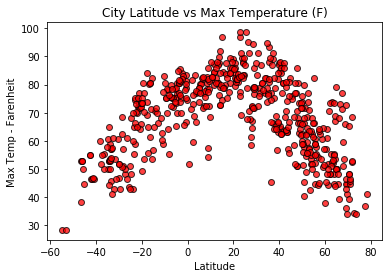

In [13]:
#Build the scatter plot for Latitude vs Temp
Latitude = pd.to_numeric(cities["Lat"])
Temp = pd.to_numeric(cities["Max Temp"])

plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp - Farenheit")

plt.scatter(Latitude, Temp, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("LatVsTempScatter.png")
plt.show()



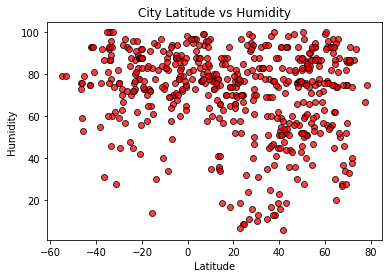

In [14]:
#Build the scatter plot for Latitude vs Humidity

humidity = pd.to_numeric(cities["Humidity"])

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(Latitude, humidity, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("LatVsHumidityScatter.png")
plt.show()

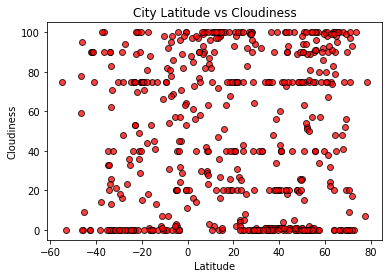

In [15]:
#Build the scatter plot for Latitude vs Cloudiness

cloudiness = pd.to_numeric(cities["Cloudiness"])

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(Latitude, cloudiness, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("LatVsCloudinessScatter.png")
plt.show()

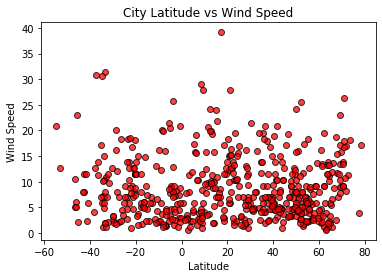

In [16]:
#Build the scatter plot for Latitude vs Wind Speed

wind = pd.to_numeric(cities["Wind Speed"])

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(Latitude, wind, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.savefig("LatVsWindSpeedScatter.png")
plt.show()